In [74]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
X, y = load_iris(return_X_y=True)

k_range = np.arange(1,31)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, scoring='accuracy')
    k_score.append(score.mean())

df = pd.DataFrame(k_score, index=k_range, columns=['scores'])
df

,scores
1,0.960000
2,0.946667
3,0.966667
4,0.973333
5,0.973333
6,0.980000
7,0.980000
8,0.966667
9,0.973333
10,0.980000


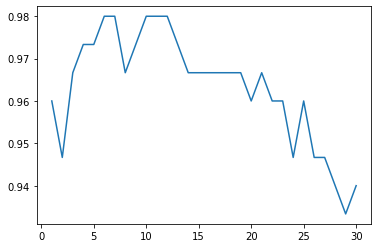

In [76]:
plt.plot(k_range, k_score)

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}

In [79]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
#n jib for parallel 

In [80]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [81]:
grid.cv_results_

{'mean_fit_time': array([0.00081999, 0.00067782, 0.0005769 , 0.00099521, 0.00063803,
        0.00042708, 0.00055463, 0.00042922, 0.00068016, 0.00052972,
        0.00054977, 0.00045674, 0.0004787 , 0.00045233, 0.00058978,
        0.00060804, 0.000651  , 0.00047197, 0.00048208, 0.00048237,
        0.00053129, 0.00062337, 0.0005429 , 0.00056472, 0.00073438,
        0.00073903, 0.00056093, 0.00056   , 0.0008688 , 0.00068922]),
 'std_fit_time': array([2.39834303e-04, 2.19344004e-04, 5.68586124e-05, 4.22258457e-04,
        2.14138841e-04, 6.08954890e-05, 2.05021598e-04, 1.21947132e-04,
        4.53175168e-04, 1.43203289e-04, 1.44644544e-04, 4.87752263e-05,
        7.61750756e-05, 5.30380121e-05, 1.65696352e-04, 1.97984403e-04,
        2.59240476e-04, 6.60744047e-05, 1.29726001e-04, 1.31140223e-04,
        1.82604576e-04, 1.56049876e-04, 1.70098296e-04, 2.39177455e-04,
        2.50354739e-04, 1.77514826e-04, 5.21640073e-05, 5.19747909e-05,
        2.50292297e-04, 5.79062532e-05]),
 'mean_scor

In [82]:
grid.cv_results_['mean_test_score']


# means = grid_search.cv_results_[‘mean_test_score’]
# params = grid_search.cv_results_[‘params’]

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

In [83]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20},
 {'n_neighbors': 21},
 {'n_neighbors': 22},
 {'n_neighbors': 23},
 {'n_neighbors': 24},
 {'n_neighbors': 25},
 {'n_neighbors': 26},
 {'n_neighbors': 27},
 {'n_neighbors': 28},
 {'n_neighbors': 29},
 {'n_neighbors': 30}]

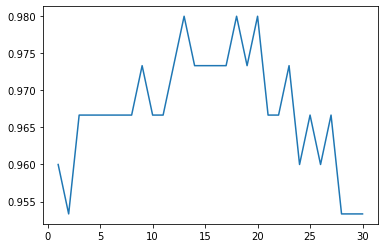

In [84]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])

In [85]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [86]:
weight_option = ['uniform','distance']
param_grid = dict(n_neighbors=k_range, weights=weight_option)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 'weights': ['uniform', 'distance']}

In [87]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)


# use best parameter that we find

In [91]:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform').fit(X, y)

knn.predict([[3, 5, 4, 2],[3, 5, 4, 2]])

array([1, 1])

In [94]:
grid.predict([[3, 5, 4, 2],[3, 5, 4, 2]])

array([1, 1])

# reduce computational

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
param_dist = dict(n_neighbors=k_range, weights=weight_option)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy')
rand.fit(X,y)
rand.cv_results_

{'mean_fit_time': array([0.00082316, 0.00042529, 0.00042336, 0.0003866 , 0.00037279,
        0.00037043, 0.00036817, 0.00036867, 0.00036669, 0.00037038]),
 'std_fit_time': array([4.26684845e-04, 4.88085167e-05, 6.69006994e-05, 1.50989754e-05,
        7.81358468e-06, 3.92783303e-06, 4.27135385e-06, 2.48699264e-06,
        2.72882536e-06, 4.32747783e-06]),
 'mean_score_time': array([0.00128982, 0.00107384, 0.0010088 , 0.00069962, 0.00062547,
        0.00093567, 0.00093074, 0.00090389, 0.00094199, 0.00066416]),
 'std_score_time': array([6.29452696e-04, 1.24438192e-04, 8.26798232e-05, 3.68183753e-05,
        2.36299635e-05, 3.52087417e-05, 6.75175149e-06, 3.60095412e-05,
        4.64273889e-06, 3.23647491e-05]),
 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'distance',
                    'distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance'],
              mask=[False, False, False, False, False, False, False, False,
              

In [98]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}
KNeighborsClassifier(n_neighbors=18)


In [100]:
best_score = []

for _ in range(20):
    param_dist = dict(n_neighbors=k_range, weights=weight_option)
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X,y)
    best_score.append(round(rand.best_score_, 3))
best_score

[0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.973,
 0.98,
 0.973,
 0.973,
 0.98,
 0.98,
 0.973,
 0.98,
 0.98,
 0.973,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98]